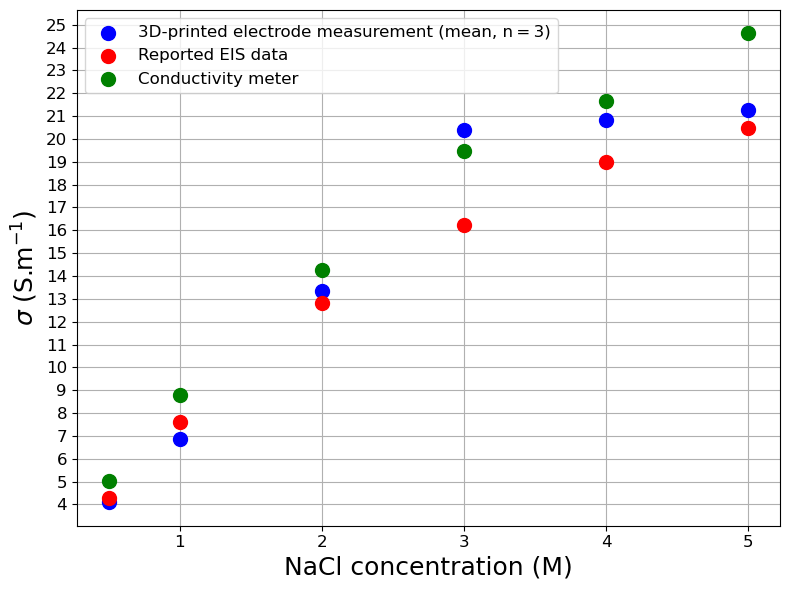

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./NaCl_OT2_Data.csv")

real_map = {
    30: 4.2791,
    60: 7.6219,
    120: 12.837,
    180: 16.219,
    240: 18.977,
    300: 20.465}
x_real = list(real_map.keys())
y_real = list(real_map.values())

x_candidates = df.iloc[:, 0]
y_candidates = df.iloc[:, -1]

plt.figure(figsize=(8, 6))

x_real       = [i/60 for i in x_real]
x_candidates = [i/60 for i in x_candidates]

y_opentrons = np.array(y_candidates)

plt.scatter(x_candidates, y_opentrons,
            color='blue',  s=100, label='3D‑printed electrode measurement (mean, n = 3)', zorder=2)
plt.scatter(x_real,        y_real,
            color='red',   s=100, label='Reported EIS data', zorder=3)

y_ph = [5.0189, 8.775, 14.25, 19.49, 21.67, 24.62]
plt.scatter(x_real[0:],    y_ph,
            color='green', s=100, label='Conductivity meter', zorder=2)

# 1‑unit y‑ticks
all_y = np.concatenate([y_opentrons, y_real, y_ph])
y_min, y_max = int(np.floor(all_y.min())), int(np.ceil(all_y.max()))
plt.yticks(np.arange(y_min, y_max + 1, 1),fontsize=12)
plt.xticks(fontsize=12)


plt.xlabel('NaCl concentration (M)', fontsize=18)
plt.ylabel(r'$\sigma$ (S.m$^{-1}$)', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


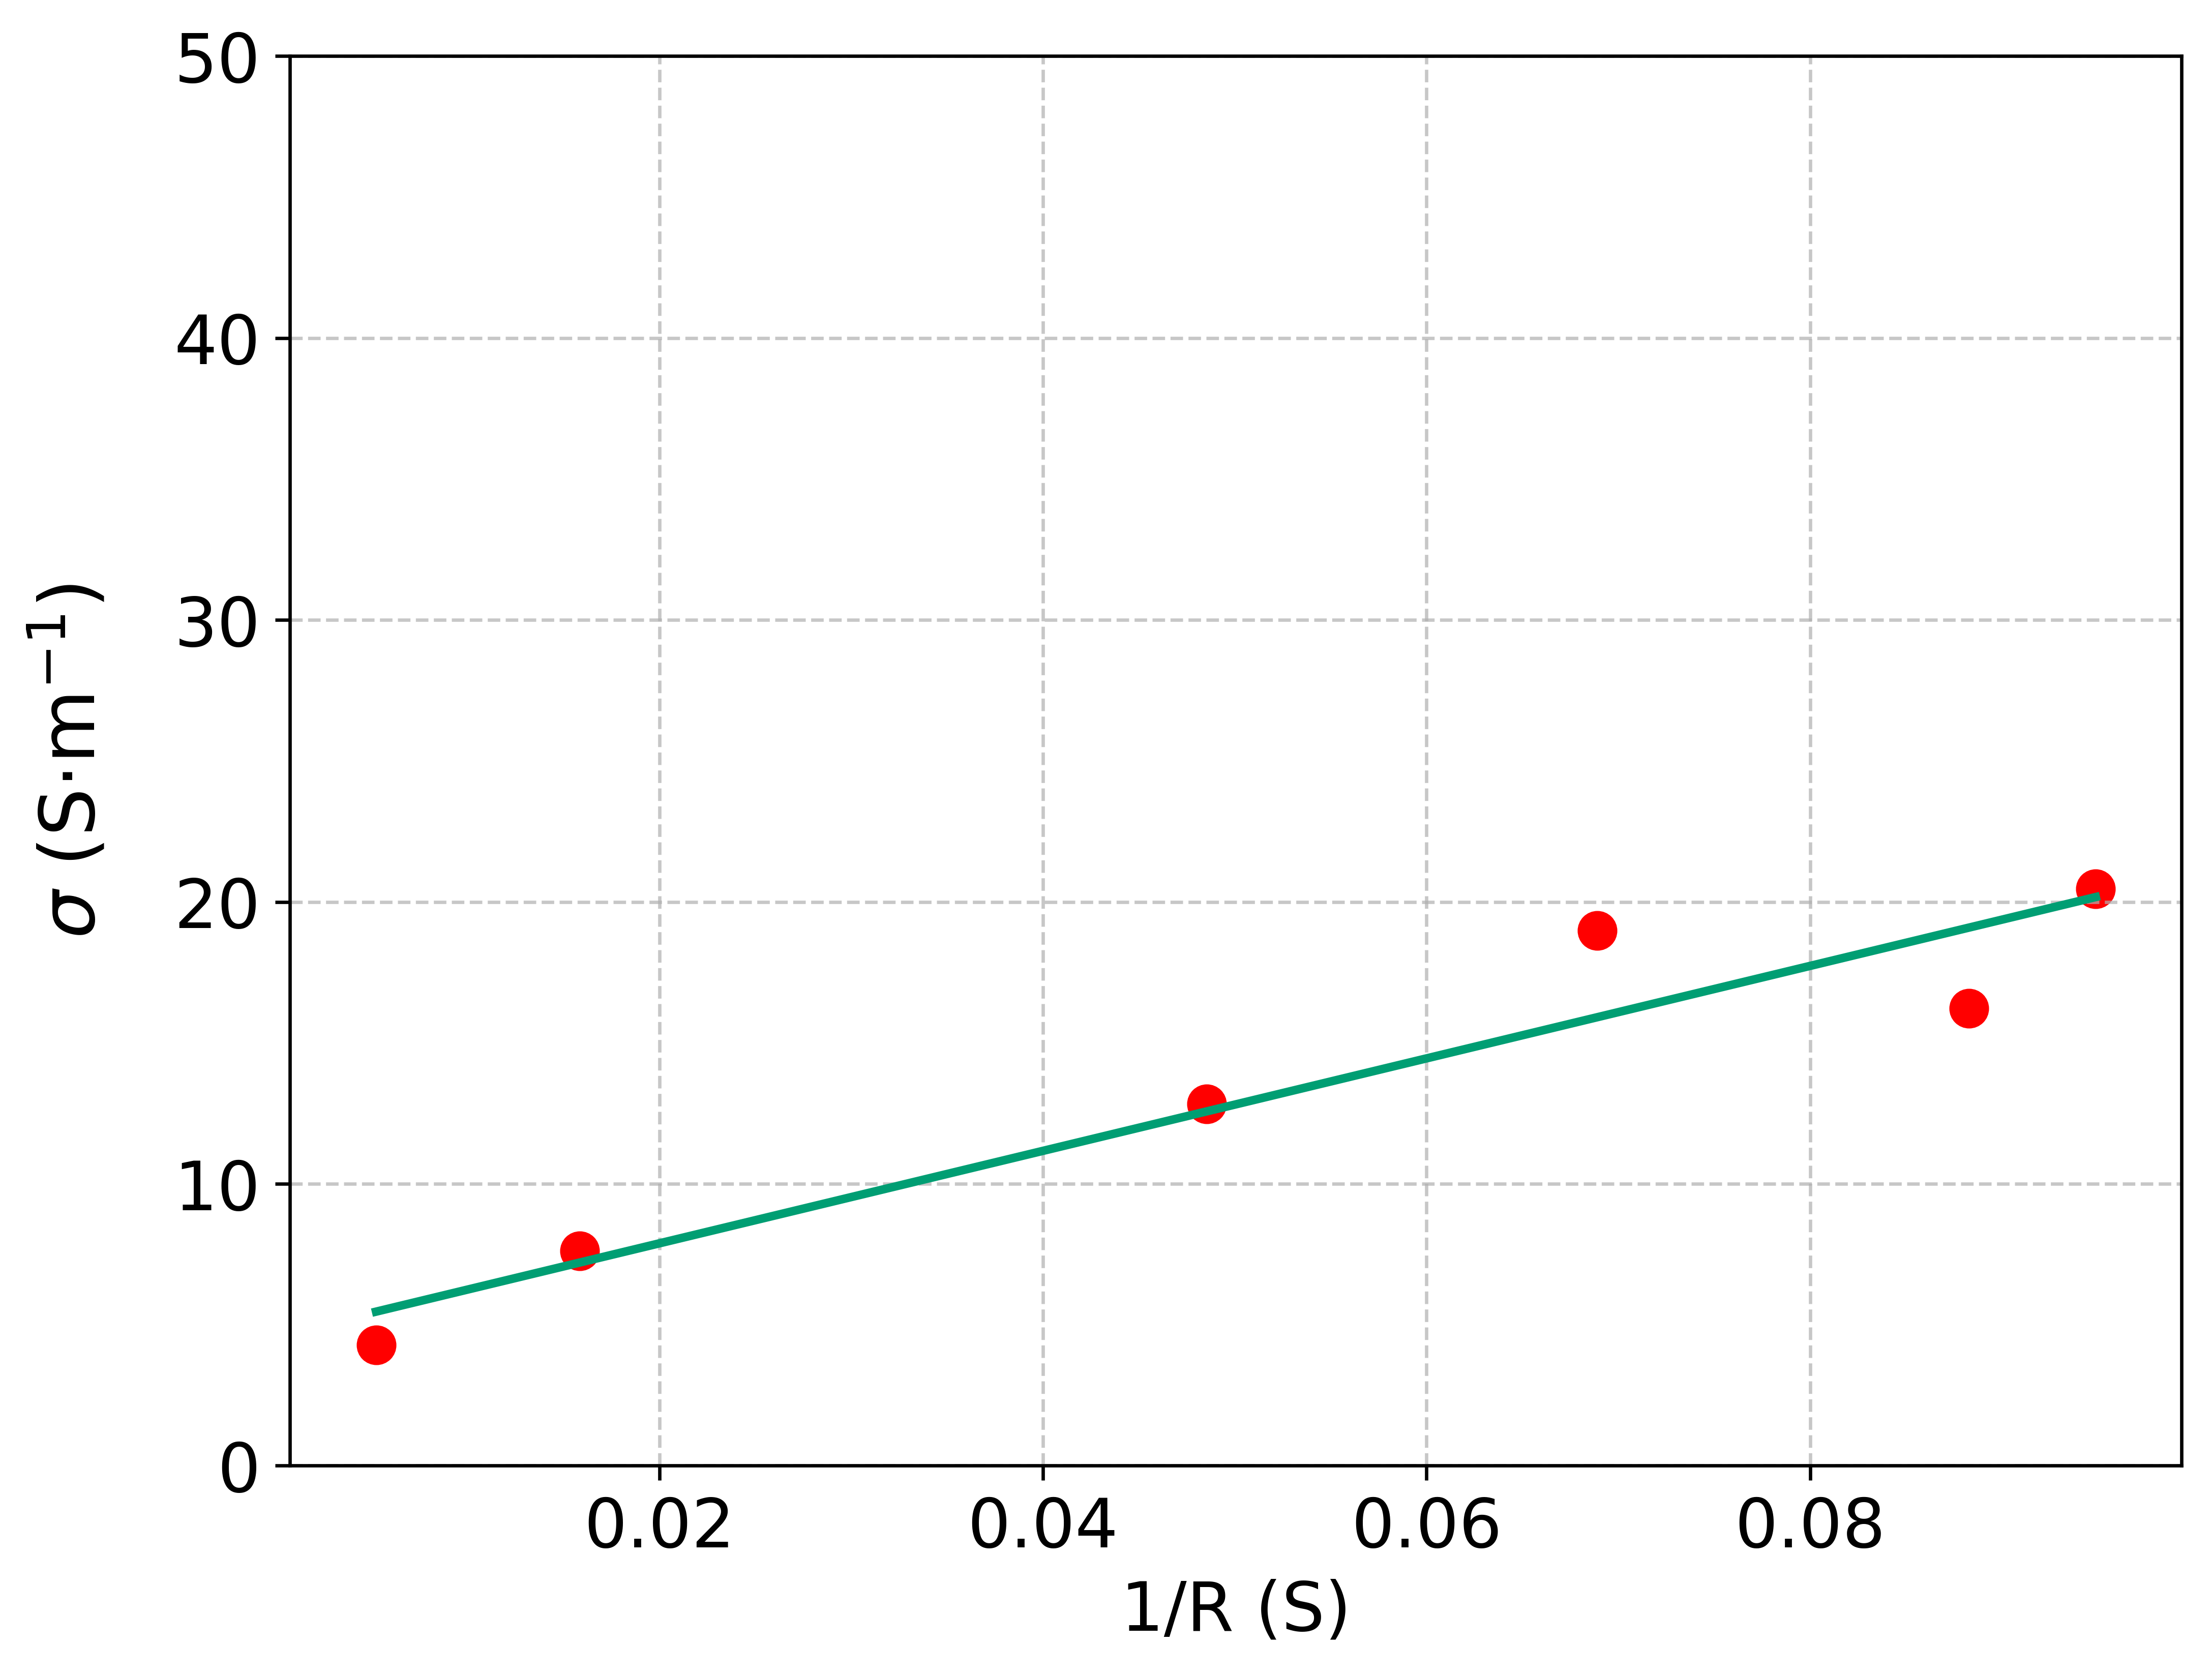

Slope: 164.04938696040813


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# DATA
xn = np.array([0.0052356, 0.01586068, 0.0485337 , 0.08826854, 0.06889027, 0.09488415])
y = np.array([4.2791, 7.6219, 12.837, 16.219, 18.977, 20.465])

slope, intercept, r_value, p_value, std_err = linregress(xn, y)
xn_fit = np.linspace(min(xn), max(xn), 100)
y_fit = slope * xn_fit + intercept

# Plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=600)
ax.scatter(xn, y, s=70, color='red')
ax.plot(xn_fit, y_fit, color='#009E73', linewidth=2)

ax.set_xlabel(r'1/R (S)', fontsize=16)
ax.set_ylabel(r'$\sigma$ (S$\cdot$m$^{-1}$)',fontsize=18, labelpad=15)
ax.grid(True, linestyle='--', alpha=0.7)
# ax.legend(loc = 'upper left',fontsize=12)
ax.tick_params(axis='both', labelsize=16)
plt.ylim(0, 50)

plt.show()

print(f"Slope: {slope}")
